In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [5]:
dictionary=pd.read_csv('data/data_dictionary.csv')
product_info=pd.read_csv('data/products.csv')
orders= pd.read_csv('data/orders.csv')     
order_items= pd.read_csv('data/order_items.csv')
refund_table=pd.read_csv('data/order_item_refunds.csv')
pageviews=pd.read_csv('data/website_pageviews.csv')
sessions=pd.read_csv('data/website_sessions.csv')

In [6]:
dictionary

,Table,Field,Description
0,orders,order_id,Unique identifier for each order (PK)
1,orders,created_at,Timestamp when the order was placed
2,orders,website_session_id,Unique identifier for the website session (FK)
3,orders,user_id,Unique identifier for the user (FK)
4,orders,primary_product_id,Unique identifier for the primary product in t...
5,orders,items_purchased,Number of items in the order
6,orders,price_usd,Total price for the items in the order
7,orders,cogs_usd,Cost of goods sold for the items in the order
8,order_items,order_item_id,Unique identifier for each order item (PK)
9,order_items,created_at,Timestamp when the order was placed


## Product Information

In [7]:
product_info

,product_id,created_at,product_name
0,1,2012-03-19 08:00:00,The Original Mr. Fuzzy
1,2,2013-01-06 13:00:00,The Forever Love Bear
2,3,2013-12-12 09:00:00,The Birthday Sugar Panda
3,4,2014-02-05 10:00:00,The Hudson River Mini bear


In [8]:
product_info.dtypes

product_id       int64
created_at      object
product_name    object
dtype: object

In [9]:
orders

,order_id,created_at,website_session_id,user_id,primary_product_id,items_purchased,price_usd,cogs_usd
0,1,2012-03-19 10:42:46,20,20,1,1,49.99,19.49
1,2,2012-03-19 19:27:37,104,104,1,1,49.99,19.49
2,3,2012-03-20 06:44:45,147,147,1,1,49.99,19.49
3,4,2012-03-20 09:41:45,160,160,1,1,49.99,19.49
4,5,2012-03-20 11:28:15,177,177,1,1,49.99,19.49
...,...,...,...,...,...,...,...,...
32308,32309,2015-03-19 03:58:12,472795,394255,1,1,49.99,19.49
32309,32310,2015-03-19 04:10:43,472798,394257,4,1,29.99,9.49
32310,32311,2015-03-19 05:27:28,472809,394268,2,2,89.98,31.98
32311,32312,2015-03-19 05:35:57,472814,394273,4,1,29.99,9.49


In [10]:
orders.columns

Index(['order_id', 'created_at', 'website_session_id', 'user_id',
       'primary_product_id', 'items_purchased', 'price_usd', 'cogs_usd'],
      dtype='object')

In [11]:
orders.isnull().sum()

order_id              0
created_at            0
website_session_id    0
user_id               0
primary_product_id    0
items_purchased       0
price_usd             0
cogs_usd              0
dtype: int64

In [12]:
orders.dtypes

order_id                int64
created_at             object
website_session_id      int64
user_id                 int64
primary_product_id      int64
items_purchased         int64
price_usd             float64
cogs_usd              float64
dtype: object

In [13]:
orders

,order_id,created_at,website_session_id,user_id,primary_product_id,items_purchased,price_usd,cogs_usd
0,1,2012-03-19 10:42:46,20,20,1,1,49.99,19.49
1,2,2012-03-19 19:27:37,104,104,1,1,49.99,19.49
2,3,2012-03-20 06:44:45,147,147,1,1,49.99,19.49
3,4,2012-03-20 09:41:45,160,160,1,1,49.99,19.49
4,5,2012-03-20 11:28:15,177,177,1,1,49.99,19.49
...,...,...,...,...,...,...,...,...
32308,32309,2015-03-19 03:58:12,472795,394255,1,1,49.99,19.49
32309,32310,2015-03-19 04:10:43,472798,394257,4,1,29.99,9.49
32310,32311,2015-03-19 05:27:28,472809,394268,2,2,89.98,31.98
32311,32312,2015-03-19 05:35:57,472814,394273,4,1,29.99,9.49


In [14]:
sales=orders["price_usd"].sum()
sales

np.float64(1938509.7500000002)

### Average Order Value

In [15]:
average_order_value = orders["price_usd"].mean()
average_order_value

np.float64(59.99163649305234)

In [16]:
order_items

,order_item_id,created_at,order_id,product_id,is_primary_item,price_usd,cogs_usd
0,1,2012-03-19 10:42:46,1,1,1,49.99,19.49
1,2,2012-03-19 19:27:37,2,1,1,49.99,19.49
2,3,2012-03-20 06:44:45,3,1,1,49.99,19.49
3,4,2012-03-20 09:41:45,4,1,1,49.99,19.49
4,5,2012-03-20 11:28:15,5,1,1,49.99,19.49
...,...,...,...,...,...,...,...
40020,40021,2015-03-19 04:10:43,32310,4,1,29.99,9.49
40021,40022,2015-03-19 05:27:28,32311,2,1,59.99,22.49
40022,40023,2015-03-19 05:27:28,32311,4,0,29.99,9.49
40023,40024,2015-03-19 05:35:57,32312,4,1,29.99,9.49


In [17]:
order_items.columns

Index(['order_item_id', 'created_at', 'order_id', 'product_id',
       'is_primary_item', 'price_usd', 'cogs_usd'],
      dtype='object')

In [18]:
order_items.isnull().sum()

order_item_id      0
created_at         0
order_id           0
product_id         0
is_primary_item    0
price_usd          0
cogs_usd           0
dtype: int64

In [19]:
order_items.dtypes

order_item_id        int64
created_at          object
order_id             int64
product_id           int64
is_primary_item      int64
price_usd          float64
cogs_usd           float64
dtype: object

In [20]:
total_orders=order_items.order_item_id.nunique()
total_orders

40025

## Units Sold Per Product

In [21]:
product_sales =order_items.groupby("product_id").size().reset_index(name="total_units_sold").sort_values("total_units_sold", ascending=False)
product_sales

,product_id,total_units_sold
0,1,24226
1,2,5796
3,4,5018
2,3,4985


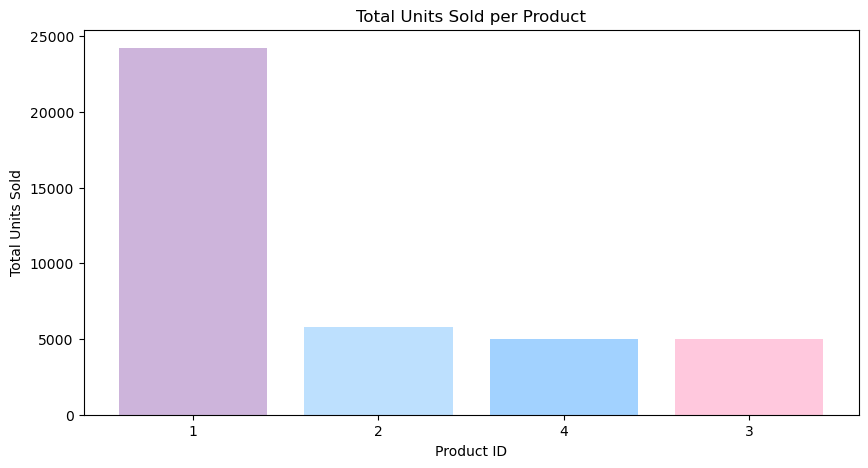

In [22]:
plt.figure(figsize=(10, 5))
plt.bar(product_sales["product_id"].astype(str), product_sales["total_units_sold"],color=['#cdb4db', '#bde0fe', '#a2d2ff', '#ffc8dd'])
plt.xlabel("Product ID")
plt.ylabel("Total Units Sold")
plt.title("Total Units Sold per Product")
plt.show()


**INSIGHTS:**
* Product 1 sells the most compared to all other products.

* Products 2, 3, and 4 have similar sales and are much lower than Product 1.

* There is a big gap between Product 1 and the other products.

* Product 1 is the main contributor to total sales.

* Other products need more promotion to increase their sales.

In [23]:
order_items['price_usd'].unique()

array([49.99, 59.99, 45.99, 29.99])

### Unique price per Product

In [24]:
order_items.groupby("product_id")["price_usd"].unique()


product_id
1    [49.99]
2    [59.99]
3    [45.99]
4    [29.99]
Name: price_usd, dtype: object

## product Combinations

In [25]:
product_pairs = order_items.merge(order_items, on="order_id")


In [26]:
product_pairs = product_pairs[
    product_pairs["product_id_x"] != product_pairs["product_id_y"]
]


In [27]:
product_pairs["pair"] = product_pairs.apply(
    lambda row: "-".join(sorted([str(row["product_id_x"]), str(row["product_id_y"])])),
    axis=1
)


In [28]:
pair_counts = (
    product_pairs.groupby("pair")
    .size()
    .reset_index(name="times_bought_together")
    .sort_values("times_bought_together", ascending=False)
)
pair_counts

,pair,times_bought_together
2,1-4,6284
1,1-3,4072
0,1-2,1888
4,2-4,1360
5,3-4,1324
3,2-3,496


In [29]:
refund_table

,order_item_refund_id,created_at,order_item_id,order_id,refund_amount_usd
0,1,2012-04-06 11:32:43,57,57,49.99
1,2,2012-04-13 01:09:43,74,74,49.99
2,3,2012-04-15 07:03:48,71,71,49.99
3,4,2012-04-17 20:00:37,118,118,49.99
4,5,2012-04-22 20:53:49,116,116,49.99
...,...,...,...,...,...
1726,1727,2015-03-30 09:37:23,39950,32255,59.99
1727,1728,2015-03-30 21:33:51,39671,32049,49.99
1728,1729,2015-03-31 19:59:48,39729,32090,49.99
1729,1730,2015-04-01 03:54:48,39717,32079,59.99


In [30]:
refund_table.columns

Index(['order_item_refund_id', 'created_at', 'order_item_id', 'order_id',
       'refund_amount_usd'],
      dtype='object')

In [31]:
total_refund=refund_table["order_item_id"].nunique()
total_refund

1731

In [32]:
actual_orders=total_orders-total_refund
actual_orders

38294

In [33]:
refund_amt=refund_table["refund_amount_usd"].sum()
refund_amt

np.float64(85338.69)

### Average Refund

In [34]:
refund_mean=refund_table["refund_amount_usd"].mean()
refund_mean

np.float64(49.3002253032929)

In [35]:
refunds_per_order = (refund_table.groupby("order_id")["refund_amount_usd"].sum().reset_index(name="total_refunded_usd"))
refunds_per_order

,order_id,total_refunded_usd
0,57,49.99
1,71,49.99
2,74,49.99
3,116,49.99
4,118,49.99
...,...,...
1718,32152,49.99
1719,32156,45.99
1720,32191,49.99
1721,32252,45.99


In [36]:
cogs_per_order = (order_items.groupby("order_item_id")["cogs_usd"].sum().reset_index(name="total_cogs_usd"))
cogs_per_order

,order_item_id,total_cogs_usd
0,1,19.49
1,2,19.49
2,3,19.49
3,4,19.49
4,5,19.49
...,...,...
40020,40021,9.49
40021,40022,22.49
40022,40023,9.49
40023,40024,9.49


## Refunds Merged with Order Items

In [37]:
refunds_items = pd.merge( refund_table, order_items, on="order_item_id")
refunds_items


,order_item_refund_id,created_at_x,order_item_id,order_id_x,refund_amount_usd,created_at_y,order_id_y,product_id,is_primary_item,price_usd,cogs_usd
0,1,2012-04-06 11:32:43,57,57,49.99,2012-03-31 02:32:43,57,1,1,49.99,19.49
1,2,2012-04-13 01:09:43,74,74,49.99,2012-04-03 19:09:43,74,1,1,49.99,19.49
2,3,2012-04-15 07:03:48,71,71,49.99,2012-04-03 15:03:48,71,1,1,49.99,19.49
3,4,2012-04-17 20:00:37,118,118,49.99,2012-04-15 09:00:37,118,1,1,49.99,19.49
4,5,2012-04-22 20:53:49,116,116,49.99,2012-04-13 14:53:49,116,1,1,49.99,19.49
...,...,...,...,...,...,...,...,...,...,...,...
1726,1727,2015-03-30 09:37:23,39950,32255,59.99,2015-03-18 10:37:23,32255,2,1,59.99,22.49
1727,1728,2015-03-30 21:33:51,39671,32049,49.99,2015-03-15 15:33:51,32049,1,1,49.99,19.49
1728,1729,2015-03-31 19:59:48,39729,32090,49.99,2015-03-16 10:59:48,32090,1,1,49.99,19.49
1729,1730,2015-04-01 03:54:48,39717,32079,59.99,2015-03-16 08:54:48,32079,2,0,59.99,22.49


In [38]:
refund_counts = refunds_items.groupby('product_id')['order_item_id'].count().reset_index()
refund_counts.columns = ['product_id', 'total_refunds']

### Total refunds per product

In [39]:
refund_counts

,product_id,total_refunds
0,1,1237
1,2,129
2,3,301
3,4,64


In [40]:
prod_refund = pd.merge( refund_counts, product_sales, on="product_id")
prod_refund

,product_id,total_refunds,total_units_sold
0,1,1237,24226
1,2,129,5796
2,3,301,4985
3,4,64,5018


### Refund Rate

In [41]:
prod_refund["refund_rate_%"]=(prod_refund['total_refunds']/prod_refund['total_units_sold'])*100

In [42]:
prod_refund

,product_id,total_refunds,total_units_sold,refund_rate_%
0,1,1237,24226,5.106084
1,2,129,5796,2.225673
2,3,301,4985,6.038114
3,4,64,5018,1.275409


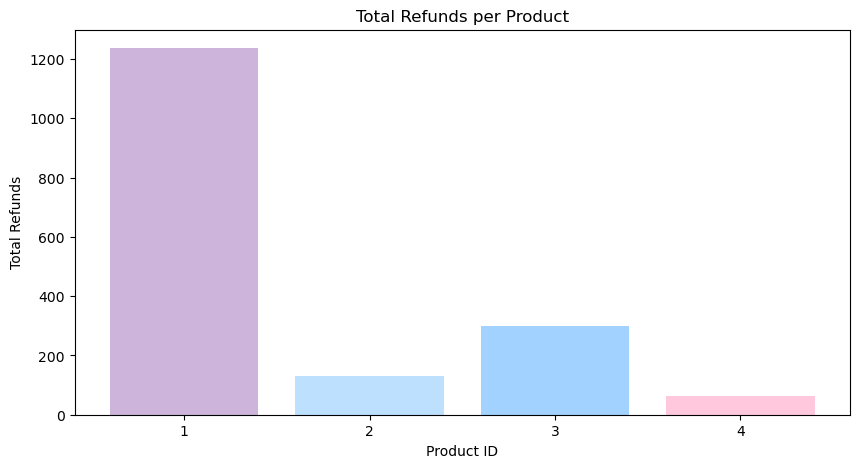

In [43]:
plt.figure(figsize=(10,5))
plt.bar(refund_counts['product_id'].astype(str), refund_counts['total_refunds'],color=['#cdb4db', '#bde0fe', '#a2d2ff', '#ffc8dd'])
plt.xlabel("Product ID")
plt.ylabel("Total Refunds")
plt.title("Total Refunds per Product")
plt.show()

**INSIGHTS:**
* Product 1 has the highest number of refunds among all products.

* Product 3 has moderate refunds, more than Products 2 and 4.

* Product 4 has the fewest refunds.

* There is a big difference between Product 1 and the other products.

* Refunds for Product 1 may indicate issues with quality, delivery, or customer expectations.

In [44]:
sales_per_product = order_items.groupby('product_id')['price_usd'].sum().reset_index()
sales_per_product.columns = ['product_id', 'sales_revenue']
sales_per_product 

,product_id,sales_revenue
0,1,1211057.74
1,2,347702.04
2,3,229260.15
3,4,150489.82


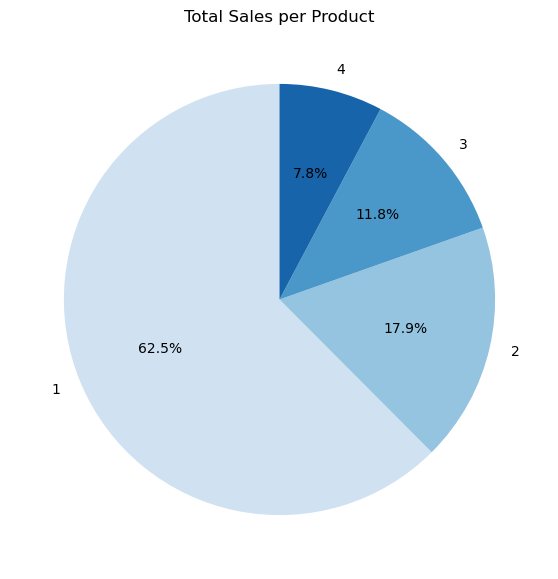

In [45]:
colors = sns.color_palette("Blues", len(sales_per_product))
plt.figure(figsize=(7,7))
plt.pie(sales_per_product['sales_revenue'],labels=sales_per_product['product_id'].astype(str),autopct='%1.1f%%',startangle=90,colors=colors)
plt.title("Total Sales per Product")
plt.show()


**INSIGHTS:**
* Product 1 contributes the most sales, about 62% of total sales.

* Product 2 contributes around 18% of total sales.

* Product 3 contributes about 12% of total sales.

* Product 4 has the lowest share, around 8% of total sales.

* Sales are highly dependent on Product 1, while the other products together make up about 38% of sales.

In [46]:
refund_per_product = refunds_items.groupby('product_id')['refund_amount_usd'].sum().reset_index()


In [47]:
refund_per_product

,product_id,refund_amount_usd
0,1,61837.63
1,2,7738.71
2,3,13842.99
3,4,1919.36


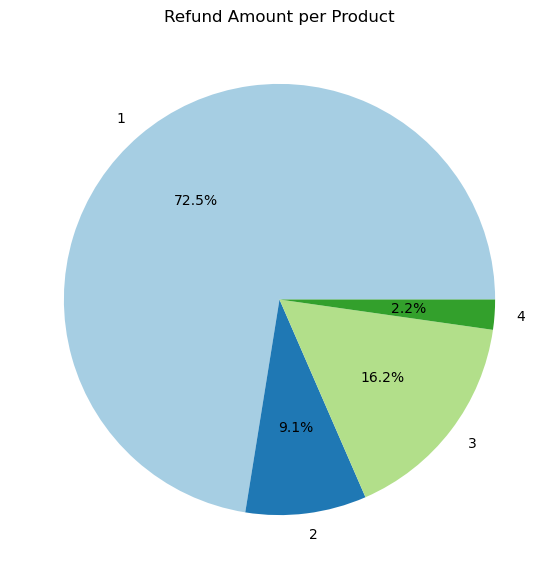

In [48]:
plt.figure(figsize=(7,7))

plt.pie(
    refund_per_product['refund_amount_usd'],
    labels=refund_per_product['product_id'].astype(str),
    autopct='%1.1f%%',
    colors=sns.color_palette("Paired", len(refund_per_product))
)

plt.title("Refund Amount per Product")
plt.show()

**INSIGHTS:**
* Product 1 has the highest refund amount, contributing about 72% of total refunds.

* Product 3 accounts for around 16% of the total refund amount.

* Product 2 contributes about 9% of the refund amount.

* Product 4 has very low refunds, only about 2%.

* Refunds are mostly coming from Product 1, which may indicate quality or customer satisfaction issues with that product.

In [49]:
prod_info=pd.merge(sales_per_product,refund_per_product,on='product_id')

In [50]:
prod_info

,product_id,sales_revenue,refund_amount_usd
0,1,1211057.74,61837.63
1,2,347702.04,7738.71
2,3,229260.15,13842.99
3,4,150489.82,1919.36


In [51]:
prod_info['net_revenue'] = prod_info['sales_revenue'] - prod_info['refund_amount_usd']



In [52]:
prod_info

,product_id,sales_revenue,refund_amount_usd,net_revenue
0,1,1211057.74,61837.63,1149220.11
1,2,347702.04,7738.71,339963.33
2,3,229260.15,13842.99,215417.16
3,4,150489.82,1919.36,148570.46


## Total net revenue

In [53]:
prod_info['net_revenue'].sum()

np.float64(1853171.06)

C:\Users\NIDHI\AppData\Local\Temp\ipykernel_12380\4059377519.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( data=prod_info, x='product_id', y='net_revenue', palette='Paired')


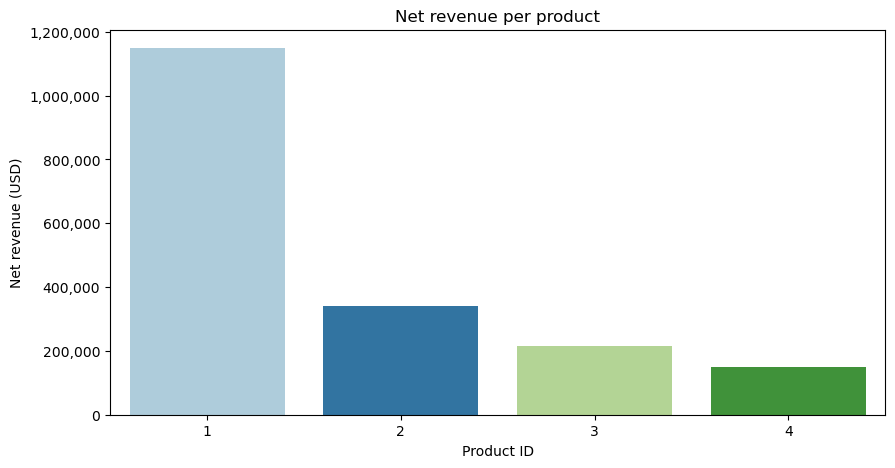

In [54]:
plt.figure(figsize=(10,5))
sns.barplot( data=prod_info, x='product_id', y='net_revenue', palette='Paired')
plt.xlabel("Product ID")
plt.ylabel("Net revenue (USD)")
plt.title("Net revenue per product")
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.show()

**INSIGHTS:**
* Product 1 generates the highest net revenue, about $1.15 million.

* Product 2 generates around $0.34 million in net revenue.

* Product 3 contributes about $0.21 million in net revenue.

* Product 4 has the lowest net revenue, around $0.15 million.

* There is a very large gap between Product 1 and the other products.

* Net revenue is mainly driven by Product 1, while Products 3 and 4 contribute much less

## Customer Lifecycle Analysis

In [55]:
user_orders = orders.groupby("user_id")["order_id"].count().reset_index()
user_orders.columns = ["user_id", "total_orders"]


In [56]:
user_orders["user_type"] = "New User"
user_orders.loc[user_orders["total_orders"] > 1, "user_type"] = "Repeat User"


In [57]:
user_counts =user_orders["user_type"].value_counts()
user_counts

user_type
New User       31105
Repeat User      591
Name: count, dtype: int64

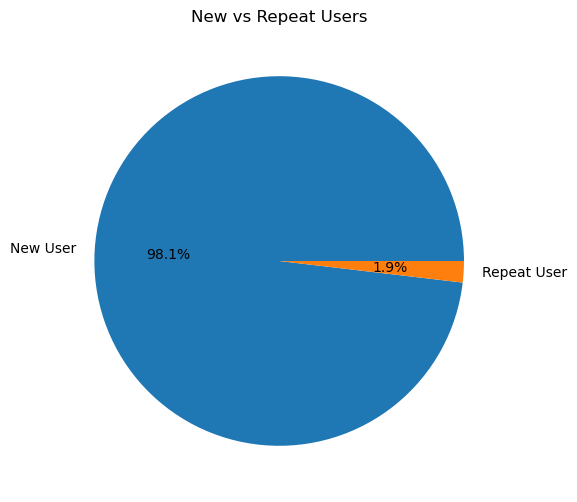

In [58]:
plt.figure(figsize=(6,6))
plt.pie(user_counts.values, labels=user_counts.index, autopct='%1.1f%%')
plt.title("New vs Repeat Users")
plt.show()

**INSIGHTS:**
* New users make up about 98% of total users.

* Repeat users are only around 2% of the total user base.

* This shows the business is getting many new customers but very few customers are returning.

* There is a huge gap between new and repeat users.

* This suggests a need to improve customer retention and loyalty programs.

# Overall Trends

In [60]:
orders["created_at"] = pd.to_datetime(orders["created_at"])


In [61]:
orders

,order_id,created_at,website_session_id,user_id,primary_product_id,items_purchased,price_usd,cogs_usd
0,1,2012-03-19 10:42:46,20,20,1,1,49.99,19.49
1,2,2012-03-19 19:27:37,104,104,1,1,49.99,19.49
2,3,2012-03-20 06:44:45,147,147,1,1,49.99,19.49
3,4,2012-03-20 09:41:45,160,160,1,1,49.99,19.49
4,5,2012-03-20 11:28:15,177,177,1,1,49.99,19.49
...,...,...,...,...,...,...,...,...
32308,32309,2015-03-19 03:58:12,472795,394255,1,1,49.99,19.49
32309,32310,2015-03-19 04:10:43,472798,394257,4,1,29.99,9.49
32310,32311,2015-03-19 05:27:28,472809,394268,2,2,89.98,31.98
32311,32312,2015-03-19 05:35:57,472814,394273,4,1,29.99,9.49


In [62]:
orders['created_at'].dt.year.unique()


array([2012, 2013, 2014, 2015], dtype=int32)

In [63]:
yearly_orders = orders.groupby(orders['created_at'].dt.year).size().reset_index(name="Sales_per_year")
yearly_orders


,created_at,Sales_per_year
0,2012,2586
1,2013,7447
2,2014,16860
3,2015,5420


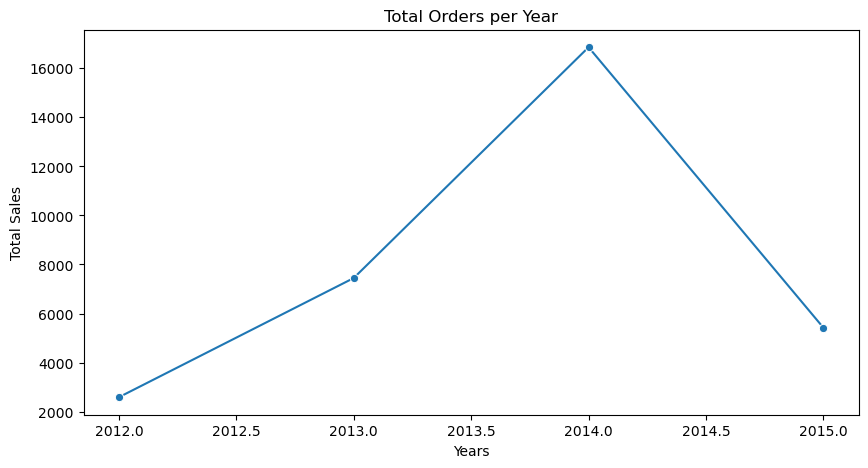

In [64]:
plt.figure(figsize=(10,5))
sns.lineplot(data=yearly_orders, x='created_at', y='Sales_per_year', marker='o')
plt.xlabel("Years")
plt.ylabel("Total Sales")
plt.title("Total Orders per Year")
plt.show()


**INSIGHTS:**
* Total orders increased from about 2,500 in 2012 to around 7,500 in 2013.

* Orders reached the highest point in 2014 with about 16,800 orders.

* In 2015, orders dropped to around 5,500.

* This shows a strong growth from 2012 to 2014, followed by a sharp decline in 2015.

* The peak year for orders was 2014, while 2012 had the lowest orders

In [65]:
Monthly_orders = orders.groupby(orders['created_at'].dt.month).size().reset_index(name="Orders_per_Month")
Monthly_orders

,created_at,Orders_per_Month
0,1,3470
1,2,3587
2,3,2765
3,4,1893
4,5,2047
5,6,1972
6,7,2059
7,8,2161
8,9,2340
9,10,2688


C:\Users\NIDHI\AppData\Local\Temp\ipykernel_12380\453646576.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Monthly_orders,x='created_at',y='Orders_per_Month',palette='mako')


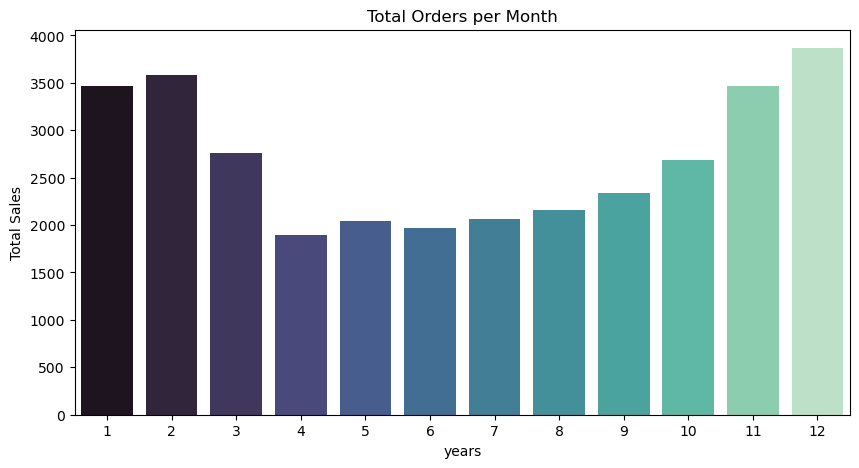

In [66]:
plt.figure(figsize=(10,5))
sns.barplot(data=Monthly_orders,x='created_at',y='Orders_per_Month',palette='mako')
plt.xlabel("years")
plt.ylabel("Total Sales")
plt.title("Total Orders per Month")
plt.show()

**INSIGHTS:**
* Orders are high at the beginning of the year, with about 3,500 in January and 3,600 in February.

* Orders drop in April to around 1,900, which is one of the lowest months.

* From May to August, orders stay almost stable between 2,000 and 2,200.

* Orders start increasing again from September (~2,350).

* The highest orders are seen in December with about 3,900 orders.

* Overall, there is a dip in mid-year (April–June) and a strong rise towards the end of the year (Oct–Dec).

In [67]:
weekly_orders = orders.groupby(orders['created_at'].dt.day_name()).size()
weekly_orders

created_at
Friday       5571
Monday       5662
Saturday     2309
Sunday       2538
Thursday     5414
Tuesday      5320
Wednesday    5499
dtype: int64

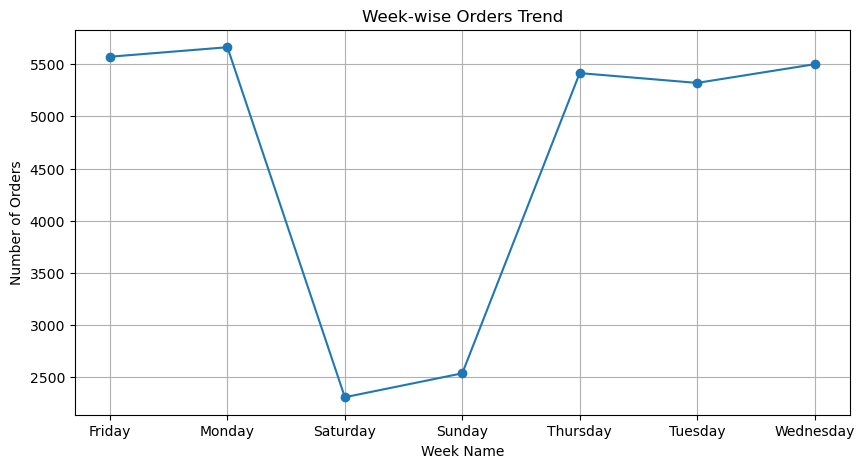

In [68]:
plt.figure(figsize=(10,5))         
plt.plot(weekly_orders, marker='o') 
plt.title("Week-wise Orders Trend")
plt.xlabel("Week Name")
plt.ylabel("Number of Orders")
plt.grid(True)                    
plt.show()


**INSIGHTS:**
* Monday has the highest orders (~5,650–5,700).

* Friday and Wednesday are also high (~5,500+).

* Tuesday and Thursday are stable (~5,300–5,400).

* Saturday has the lowest orders (~2,300).

* Sunday is slightly better than Saturday (~2,500).

In [69]:
hourly_orders = orders.groupby(orders['created_at'].dt.hour).size()
hourly_orders

created_at
0      823
1      721
2      586
3      546
4      549
5      566
6      684
7      756
8     1149
9     1661
10    1948
11    2194
12    2172
13    2085
14    2153
15    2188
16    2099
17    1922
18    1593
19    1378
20    1189
21    1192
22    1131
23    1028
dtype: int64

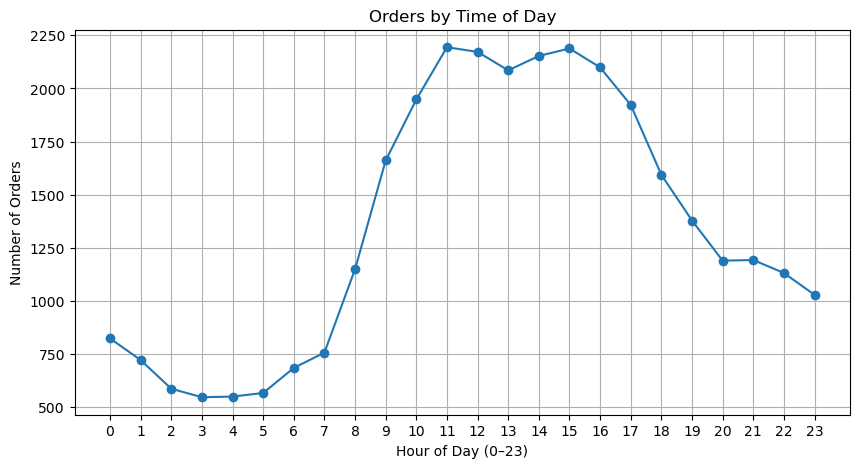

In [70]:
plt.figure(figsize=(10,5))
plt.plot(hourly_orders, marker='o')
plt.title("Orders by Time of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.xticks(range(24))
plt.show()

**INSIGHTS:**
* Orders are lowest early morning (3 AM–5 AM) at around 550–600 orders.

* Orders start increasing after 7 AM (~750) and rise sharply from 8 AM (~1,150) to 10 AM (~1,950).

* Peak time is between 11 AM and 3 PM, with the highest around 2,200 orders (11 AM & 3 PM).

* Orders remain strong till 4 PM (~2,100).

* After 5 PM, orders gradually decrease.

* By 10 PM–11 PM, orders fall to around 1,100–1,000.

## Refund Trend

In [71]:
refund_table["created_at"] = pd.to_datetime(refund_table["created_at"])

In [72]:
Yearly_Refund_orders = refund_table.groupby(refund_table['created_at'].dt.year).size().reset_index(name="Refunds_per_Year")
Yearly_Refund_orders

,created_at,Refunds_per_Year
0,2012,169
1,2013,339
2,2014,960
3,2015,263


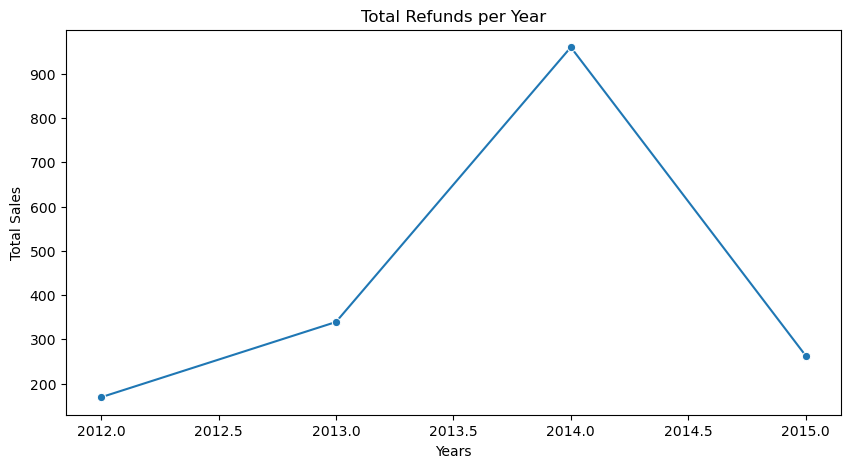

In [73]:
plt.figure(figsize=(10,5))
sns.lineplot(data=Yearly_Refund_orders, x='created_at', y='Refunds_per_Year', marker='o')
plt.xlabel("Years")
plt.ylabel("Total Sales")
plt.title("Total Refunds per Year")
plt.show()


**INSIGHTS:**
* Refunds showed a steady increase from 2012 to 2014, with a major jump in 2014.

* The spike in 2014 may indicate product/service issues or higher sales volume.

* In 2015, refunds reduced significantly, suggesting improvement in quality, customer satisfaction, or refund control.

In [74]:
Monthly_Refund_orders = refund_table.groupby(refund_table['created_at'].dt.to_period('M')).size().reset_index(name="Refunds_per_Month")
Monthly_Refund_orders

,created_at,Refunds_per_Month
0,2012-04,5
1,2012-05,5
2,2012-06,5
3,2012-07,13
4,2012-08,18
5,2012-09,21
6,2012-10,24
7,2012-11,40
8,2012-12,38
9,2013-01,21


In [75]:
Monthly_Refund_orders1=refund_table.groupby(refund_table['created_at'].dt.month).size().reset_index(name="Refunds_per_Month")
Monthly_Refund_orders1

,created_at,Refunds_per_Month
0,1,157
1,2,151
2,3,148
3,4,85
4,5,87
5,6,108
6,7,136
7,8,146
8,9,282
9,10,103


C:\Users\NIDHI\AppData\Local\Temp\ipykernel_12380\4045890746.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Monthly_Refund_orders1,x='created_at',y='Refunds_per_Month',palette='summer')


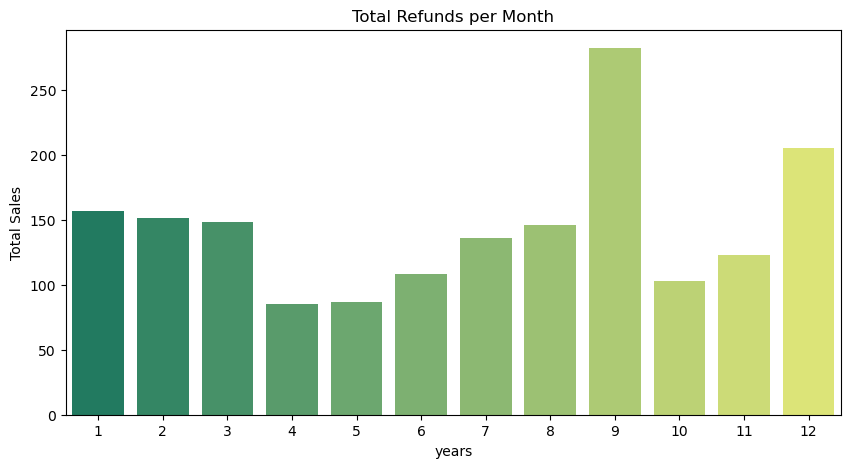

In [76]:
plt.figure(figsize=(10,5))
sns.barplot(data=Monthly_Refund_orders1,x='created_at',y='Refunds_per_Month',palette='summer')
plt.xlabel("years")
plt.ylabel("Total Sales")
plt.title("Total Refunds per Month")
plt.show()

**INSIGHTS:**
* Refunds drop from Month 1 to Month 4.

* After Month 4, refunds generally rise until Month 9.

* There is a sharp spike in Month 9, the highest in the year.

* After Month 9, refunds fall in Month 10, then increase again toward Month 12